# OCR Receipt Scanner

This notebook demonstrates the process of reading characters from a receipt (image) using pytesseract. Below are the steps involved in doing so:
1. Read the image in and resize it to make receipt components readable
2. Pre-process image to denoise it, and find the edges using Canny Edge Detector
3. Find Contours to extract the receipt from the image
4. Apply OCR using Pytesseract on the extracted receipt

### Importing Required Libraries

In [1]:
! pip install pytesseract
! pip install imutils
import cv2 as cv
import pytesseract
import imutils
from imutils.perspective import four_point_transform
import matplotlib.pyplot as plt

### Reading in the image

In [2]:
receipt = cv.imread("Receipt_2.jpg")
image = receipt.copy()
image = imutils.resize(image, width=500)
ratio = receipt.shape[1] / float(image.shape[1])
ratio

1.6

### Processing the image

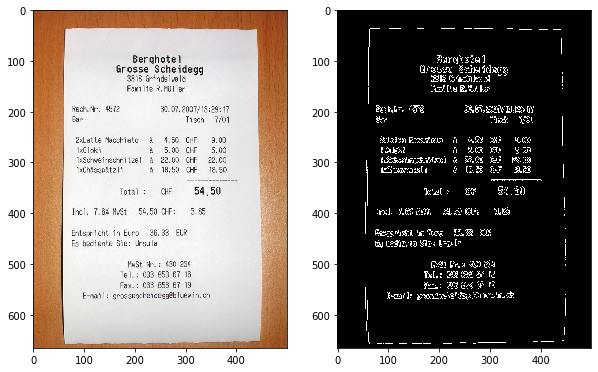

In [3]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
blurred = cv.GaussianBlur(gray, (5,5), 0)
edged = cv.Canny(blurred, 75, 200)

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB), cmap="gray")

plt.subplot(122)
plt.imshow(edged, cmap="gray")

### Finding Contours

In [4]:
cnts = cv.findContours(edged.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv.contourArea, reverse=True)

### Getting the Outline of the receipt

In [5]:
receiptCnts = None

for c in cnts:
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.02*peri, True)
    
    if len(approx) == 4:
        receiptCnts = approx
        break

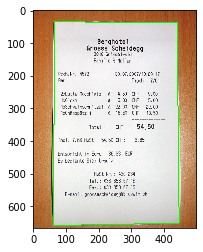

In [6]:
output = image.copy()
cv.drawContours(output, [receiptCnts], -1, (0,255,0), 2)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))

### Apply Four Point Transformation

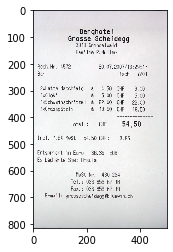

In [7]:
receipt_output = four_point_transform(receipt, receiptCnts.reshape(4, 2)*ratio)
plt.imshow(imutils.resize(receipt_output, width=500))

### OCR using Pytesseract

In [12]:
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
text = pytesseract.image_to_string(cv.cvtColor(receipt_output, cv.COLOR_BGR2RGB), config="--psm 4")

In [14]:
print(text)

Berghotel
Grosse Scheidegg
3818 Grindelwald
Familie R. Miller

Rech.Nr. 4572 30.07. 2007/13:29: 17
Bar Tisch 7/01
exLatte Macchiato a 4.50 CHF 9,00
IxGloki a) 5:00 CHE = 5-00)
IxSchweinschnitzel a 22.00 CHF 22.00
IxChasspatz |i a 18.50 CHF 18.50

Total : CHF 54.50

Incl. 7.6% MwSt 54.50 CHF: 3.85

Entspricht in Euro 36.33 EUR
Es bediente Sie: Ursula

MwSt Nr. : 430 234
Tel. : 033 853 67 16
Fax. : 033 853 67 19
E-mail: grossescheidegg@bluewin. ch



The receipt components were read successfully with great accuracy.